## import data from database

In [1]:
import matplotlib.pyplot as plt  # type: ignore
import geopandas as gpd  # type: ignore
from dotenv import load_dotenv
import sqlalchemy as sq
import pandas as pd
import os, sys

sys.path.append("../")
from Shared.DataService import DataService

e:\Programming\CGC_Grain_Outcome_Predictions\env\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\danew\AppData\Local\Temp\ipykernel_2124\1057841555.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be sm

In [2]:
load_dotenv()
PG_USER = os.getenv("POSTGRES_USER")
PG_PW = os.getenv("POSTGRES_PW")
PG_DB = os.getenv("POSTGRES_DB")
PG_ADDR = os.getenv("POSTGRES_ADDR")
PG_PORT = os.getenv("POSTGRES_PORT")

In [3]:
db = DataService(PG_DB, PG_ADDR, PG_PORT, PG_USER, PG_PW)
conn = db.connect()

In [4]:
query = sq.text("select * FROM public.ab_station_data")
ab_df = pd.read_sql(query, conn)

In [5]:
query = sq.text("select * FROM public.mb_station_data")
mb_df = pd.read_sql(query, conn)

In [6]:
query = sq.text("select * FROM public.sk_station_data")
sk_df = pd.read_sql(query, conn)

In [25]:
sk_df.drop(columns=['station_id', 'year', 'month', 'day'], inplace=True)
ab_df.drop(columns=['station_id', 'year', 'month', 'day'], inplace=True)
mb_df.drop(columns=['station_id', 'year', 'month', 'day'], inplace=True)

In [13]:
ab_df.describe()

,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,1931775,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06,1.931775e+06
mean,2002-02-25 02:34:13.524867456,2.001649e+03,6.564118e+00,1.574447e+01,9.489220e+00,-3.020935e+00,3.239889e+00,3.225538e-01,1.252362e-01,1.005055e+00,2.195590e+00
min,1881-10-26 00:00:00,1.881000e+03,1.000000e+00,1.000000e+00,-4.440000e+01,-5.220000e+01,-4.830000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1998-04-29 00:00:00,1.998000e+03,4.000000e+00,8.000000e+00,9.000000e-01,-1.000000e+01,-4.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2010-01-22 00:00:00,2.010000e+03,7.000000e+00,1.600000e+01,1.080000e+01,-1.200000e+00,4.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2016-12-11 00:00:00,2.016000e+03,1.000000e+01,2.300000e+01,2.010000e+01,6.200000e+00,1.320000e+01,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00
max,2022-12-31 00:00:00,2.022000e+03,1.200000e+01,3.100000e+01,4.280000e+01,2.630000e+01,3.250000e+01,1.284000e+02,5.760000e+01,1.800000e+02,1.320000e+02
std,NaN,2.331777e+01,3.444255e+00,8.799829e+00,1.314522e+01,1.162987e+01,1.215208e+01,2.218248e+00,9.087223e-01,3.492054e+00,7.876043e+00


In [37]:
mb_df.describe()

,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000,684983.000000
mean,6.187498,-4.661616,0.765487,0.600898,0.215455,1.213462,5.581216
std,15.238056,14.454217,14.660538,3.193125,1.206760,4.165617,13.487690
min,-40.000000,-49.400000,-43.100000,0.000000,0.000000,0.000000,0.000000
25%,-5.300000,-15.600000,-10.400000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,-2.100000,2.500000,0.000000,0.000000,0.000000,0.000000
75%,19.500000,7.300000,13.400000,0.000000,0.000000,0.400000,0.000000
max,41.300000,25.100000,31.400000,303.000000,60.000000,303.000000,148.000000


In [15]:
sk_df.describe()

,date,year,month,day,max_temp,min_temp,mean_temp,total_rain,total_snow,total_precip,snow_on_grnd
count,924353,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000,924353.000000
mean,1990-12-27 03:56:58.214902784,1990.487070,6.531193,15.730415,8.000697,-4.154620,1.927026,0.520321,0.182710,1.027881,3.822943
min,1883-12-01 00:00:00,1883.000000,1.000000,1.000000,-47.200000,-52.600000,-48.100000,0.000000,0.000000,0.000000,0.000000
25%,1977-08-17 00:00:00,1977.000000,4.000000,8.000000,-2.800000,-13.000000,-7.800000,0.000000,0.000000,0.000000,0.000000
50%,1999-05-11 00:00:00,1999.000000,7.000000,16.000000,9.400000,-2.000000,3.800000,0.000000,0.000000,0.000000,0.000000
75%,2011-10-25 00:00:00,2011.000000,10.000000,23.000000,20.600000,6.800000,13.700000,0.000000,0.000000,0.300000,0.000000
max,2022-12-31 00:00:00,2022.000000,12.000000,31.000000,43.300000,27.200000,32.800000,192.800000,47.800000,192.800000,420.000000
std,NaN,27.980299,3.455233,8.798306,14.750140,13.284542,13.809690,2.812864,1.035287,3.620737,10.254643


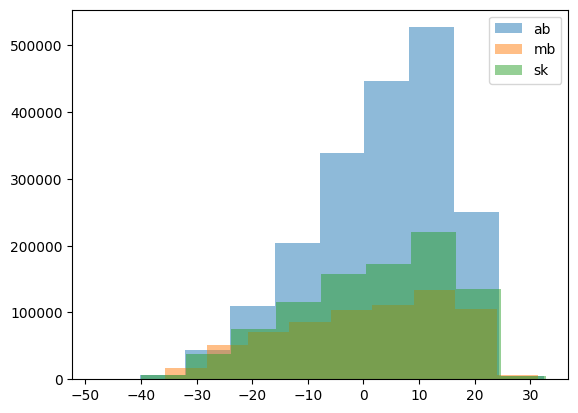

In [28]:
plt.hist(ab_df['mean_temp'], alpha=0.5, label="ab")
plt.hist(mb_df['mean_temp'], alpha=0.5, label="mb")
plt.hist(sk_df['mean_temp'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

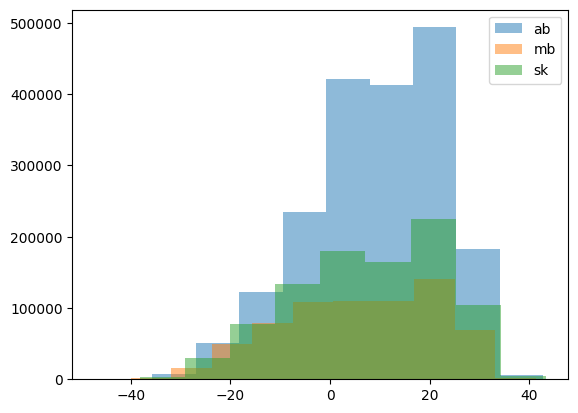

In [29]:
plt.hist(ab_df['max_temp'], alpha=0.5, label="ab")
plt.hist(mb_df['max_temp'], alpha=0.5, label="mb")
plt.hist(sk_df['max_temp'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

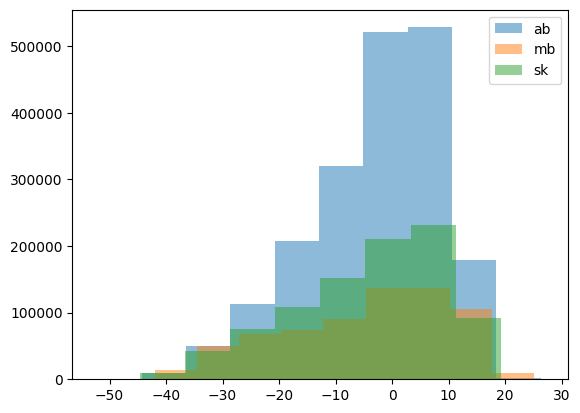

In [30]:
plt.hist(ab_df['min_temp'], alpha=0.5, label="ab")
plt.hist(mb_df['min_temp'], alpha=0.5, label="mb")
plt.hist(sk_df['min_temp'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

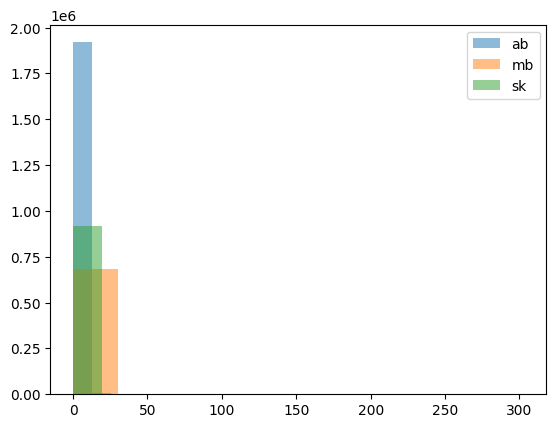

In [31]:
plt.hist(ab_df['total_rain'], alpha=0.5, label="ab")
plt.hist(mb_df['total_rain'], alpha=0.5, label="mb")
plt.hist(sk_df['total_rain'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

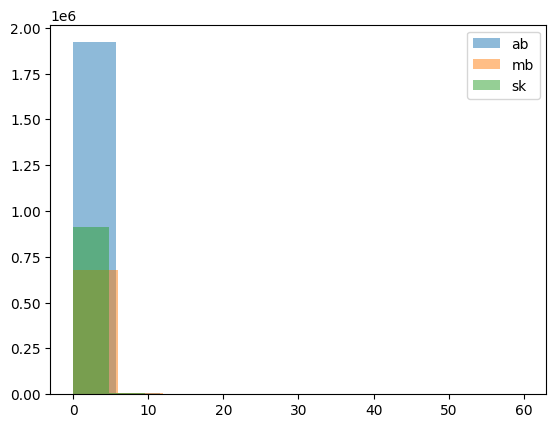

In [32]:
plt.hist(ab_df['total_snow'], alpha=0.5, label="ab")
plt.hist(mb_df['total_snow'], alpha=0.5, label="mb")
plt.hist(sk_df['total_snow'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

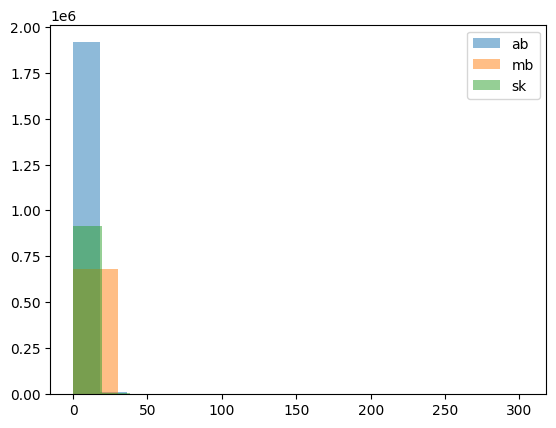

In [33]:
plt.hist(ab_df['total_precip'], alpha=0.5, label="ab")
plt.hist(mb_df['total_precip'], alpha=0.5, label="mb")
plt.hist(sk_df['total_precip'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

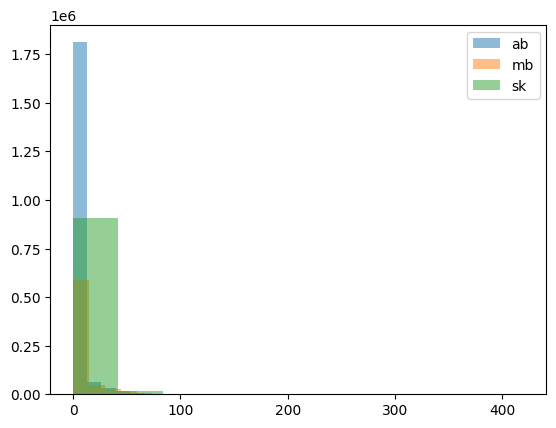

In [34]:
plt.hist(ab_df['snow_on_grnd'], alpha=0.5, label="ab")
plt.hist(mb_df['snow_on_grnd'], alpha=0.5, label="mb")
plt.hist(sk_df['snow_on_grnd'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27ac13dc0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ac13dc5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ac1203dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x27ac13dcb20>,
 'fliers': [<matplotlib.lines.Line2D at 0x27ac13dcdc0>,
 'means': []}

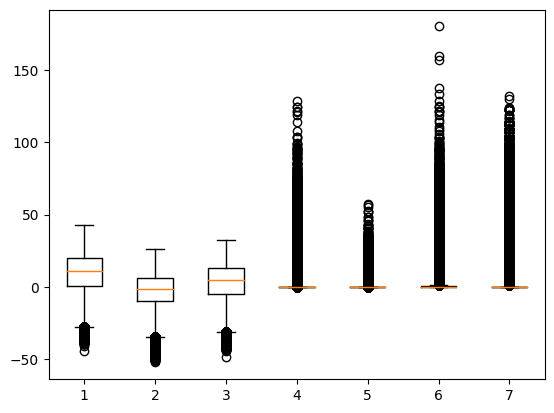

In [26]:
plt.boxplot(ab_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x27ac7ff2190>,
 'caps': [<matplotlib.lines.Line2D at 0x27ac7ff26d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ac7dd8eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x27ac7ff2c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x27ac7ff2eb0>,
 'means': []}

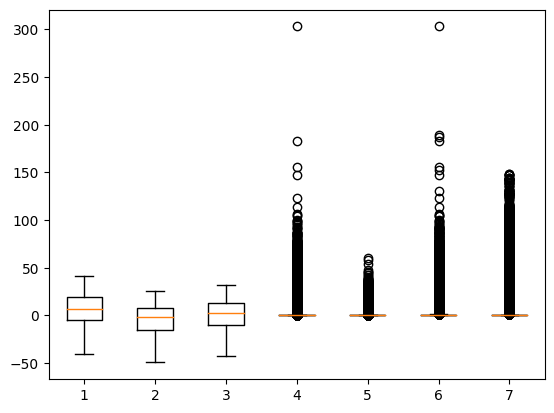

In [36]:
plt.boxplot(mb_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x27ac73ba520>,
 'caps': [<matplotlib.lines.Line2D at 0x27ac73baa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ac73a72b0>,
 'medians': [<matplotlib.lines.Line2D at 0x27ac73bafa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27ac73d2280>,
 'means': []}

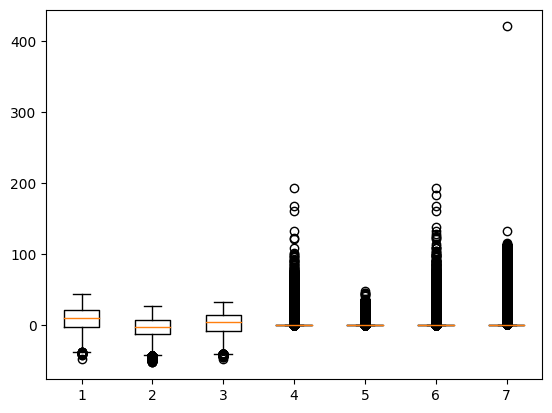

In [35]:
plt.boxplot(sk_df)

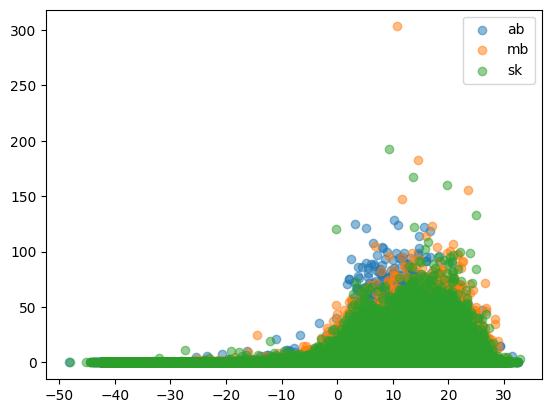

In [17]:
plt.scatter( ab_df['mean_temp'], ab_df['total_rain'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_rain'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_rain'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

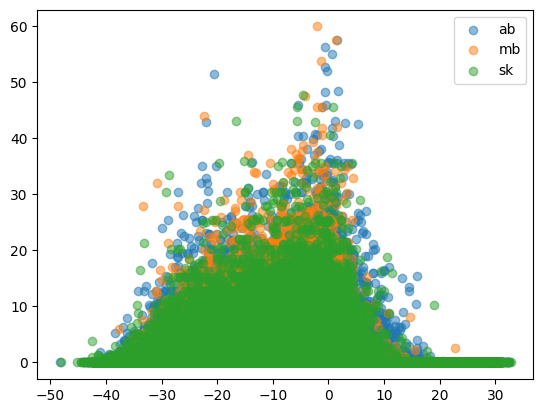

In [18]:
plt.scatter( ab_df['mean_temp'], ab_df['total_snow'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_snow'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_snow'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

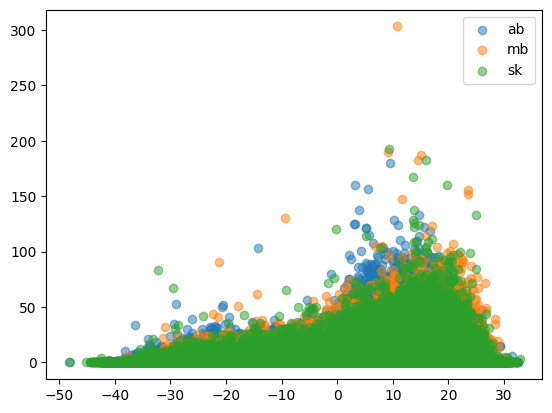

In [19]:
plt.scatter( ab_df['mean_temp'], ab_df['total_precip'], alpha=0.5, label="ab")
plt.scatter( mb_df['mean_temp'], mb_df['total_precip'], alpha=0.5, label="mb")
plt.scatter( sk_df['mean_temp'], sk_df['total_precip'], alpha=0.5, label="sk")
plt.legend(loc="upper right")
plt.show()

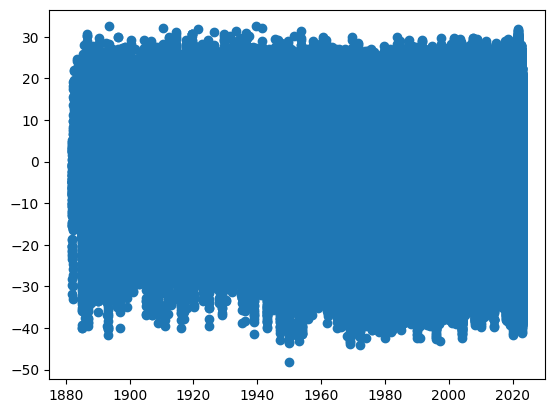

In [20]:
plt.scatter(ab_df['date'], ab_df['mean_temp'])
plt.show()

In [ ]:
plt.scatter(ab_df['date'], ab_df['mean_temp'])
plt.show()

In [ ]:
plt.scatter(ab_df['date'], ab_df['mean_temp'])
plt.show()